In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('house_price_data.csv')

## Univariate analysis of target variable

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [5]:
data['price'].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

### Handling outliers

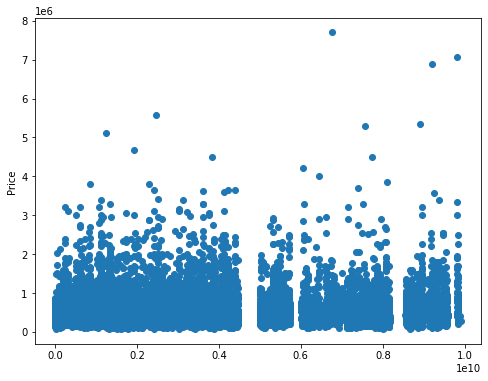

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x = data['id'], y = data['price'])
plt.ylabel('Price')
plt.show()

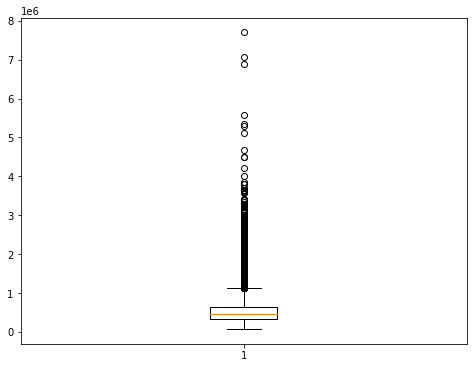

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.boxplot(data['price'])
plt.show()

In [8]:
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
iqr = q3-q1

q1, q3, iqr

(321950.0, 645000.0, 323050.0)

In [9]:
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr

upper_limit, lower_limit

(1129575.0, -162625.0)

In [10]:
def value_imputer(value):
    if value>upper_limit:
        return upper_limit
    elif value<lower_limit:
        return lower_limit
    else:
        return value

In [11]:
data['price'] = data['price'].apply(value_imputer)

In [12]:
data['price'].describe()

count    2.161300e+04
mean     5.115873e+05
std      2.500026e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: price, dtype: float64

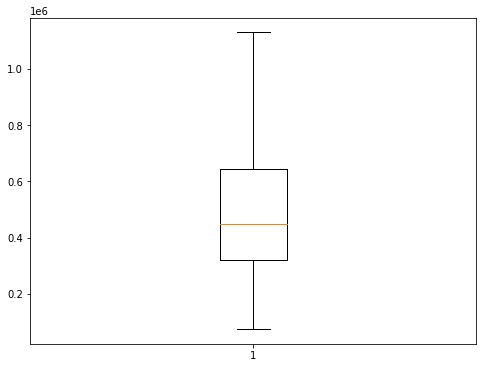

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.boxplot(data['price'])
plt.show()

### Plotting distribution

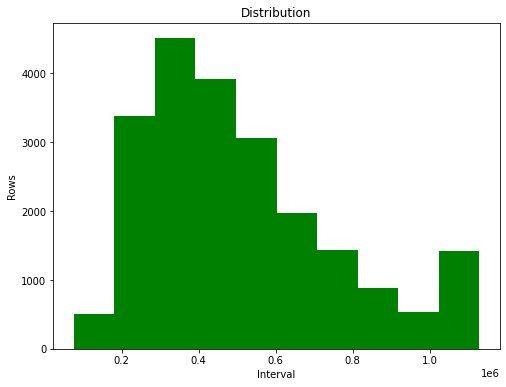

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(data['price'], bins=10, color="green")
plt.ylabel('Rows')
plt.xlabel('Interval')
plt.title('Distribution')
plt.show()

## Transforming variables

In [15]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
data['ever_renovated'] = np.where(data['yr_renovated']==0, 'no', 'yes')

In [17]:
data['ever_renovated'].value_counts()

no     20699
yes      914
Name: ever_renovated, dtype: int64

In [18]:
data['year_sold'] = pd.DatetimeIndex(data['date']).year

In [19]:
data['renovated_after'] = np.where(data['ever_renovated']=='yes', abs(data['yr_built']-data['yr_renovated']), 0)

In [20]:
data['last_renovated'] = np.where(data['ever_renovated']=='yes', abs(data['year_sold']-data['yr_renovated']), 0)

In [21]:
data['year_old'] = data['year_sold'] - data['yr_built']

In [22]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,ever_renovated,year_sold,renovated_after,last_renovated,year_old
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,no,2014,0,0,59
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,yes,2014,40,23,63
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,no,2015,0,0,82
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,no,2014,0,0,49
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,no,2015,0,0,28


In [23]:
data = data.drop(columns=['date', 'yr_renovated', 'year_sold', 'yr_built'])

In [24]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,ever_renovated,renovated_after,last_renovated,year_old
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,no,0,0,59
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,98125,47.7210,-122.319,1690,7639,yes,40,23,63
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,no,0,0,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,98136,47.5208,-122.393,1360,5000,no,0,0,49
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,no,0,0,28


## Exploring numerical columns

In [25]:
numerical_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated_after', 'last_renovated', 'year_old']

### Removing outliers

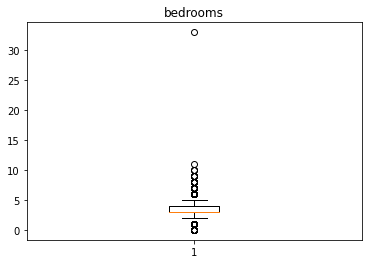

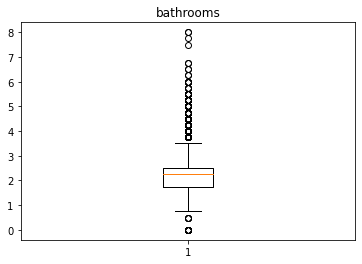

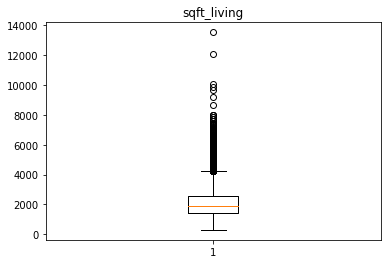

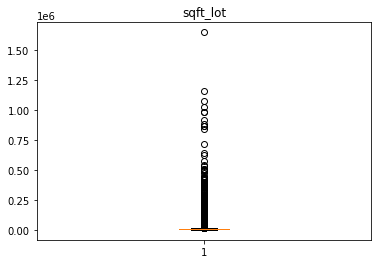

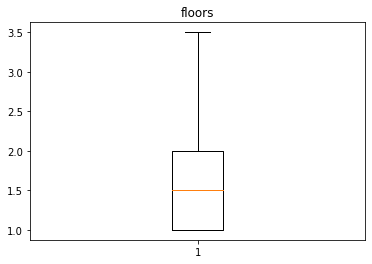

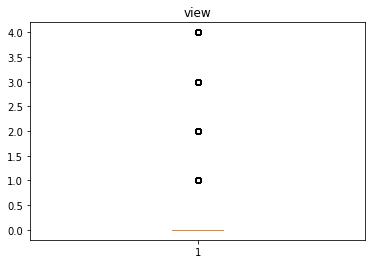

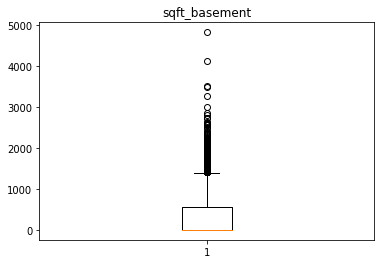

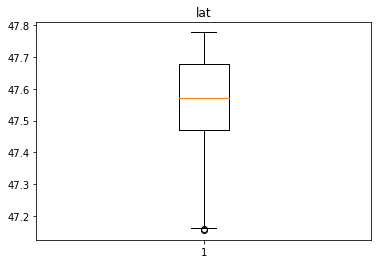

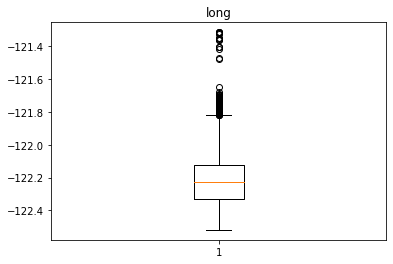

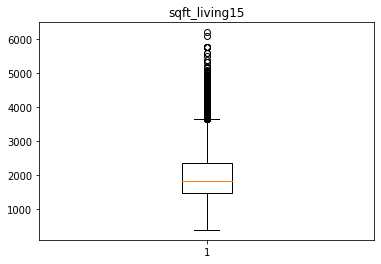

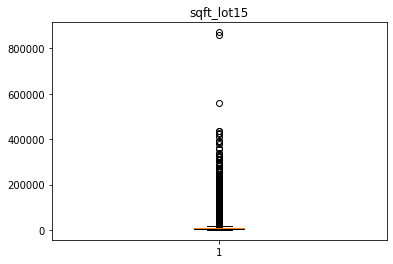

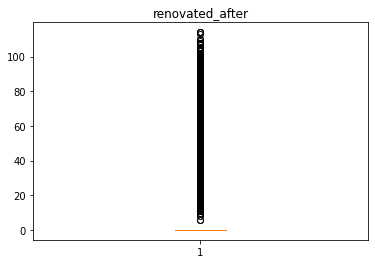

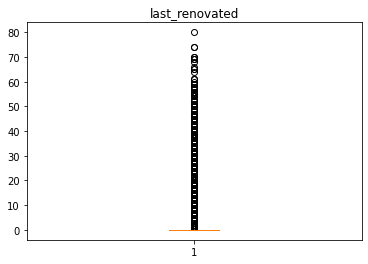

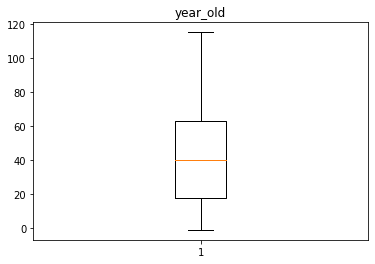

In [26]:
for col in numerical_columns:
    plt.boxplot(data[col])
    plt.title(col)
    plt.show()

In [27]:
outlier_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_basement', 'lat', 'long', 'sqft_living']

In [28]:
for col in outlier_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3+1.5*iqr
    lower_limit = q1-1.5*iqr
    data = data.loc[(data[col] > lower_limit) & (data[col] < upper_limit)]

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19394 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               19394 non-null  int64  
 1   price            19394 non-null  float64
 2   bedrooms         19394 non-null  int64  
 3   bathrooms        19394 non-null  float64
 4   sqft_living      19394 non-null  int64  
 5   sqft_lot         19394 non-null  int64  
 6   floors           19394 non-null  float64
 7   waterfront       19394 non-null  int64  
 8   view             19394 non-null  int64  
 9   condition        19394 non-null  int64  
 10  grade            19394 non-null  int64  
 11  sqft_above       19394 non-null  int64  
 12  sqft_basement    19394 non-null  int64  
 13  zipcode          19394 non-null  int64  
 14  lat              19394 non-null  float64
 15  long             19394 non-null  float64
 16  sqft_living15    19394 non-null  int64  
 17  sqft_lot15  

### Plotting distribution

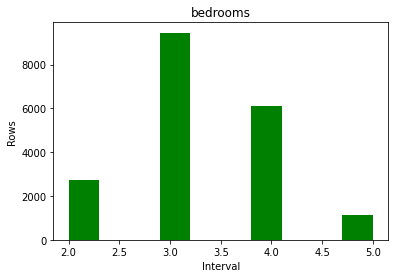

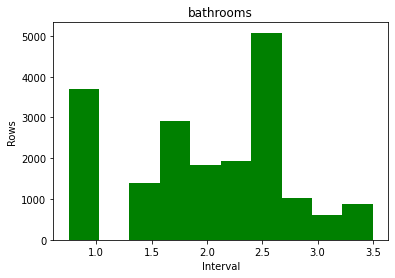

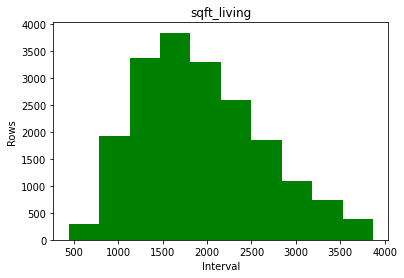

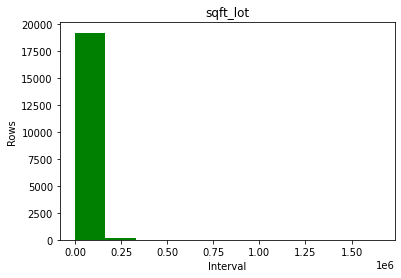

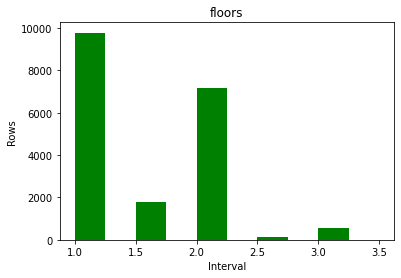

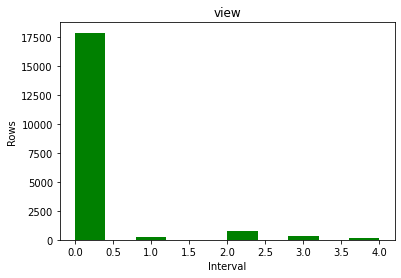

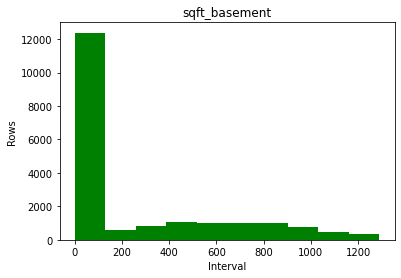

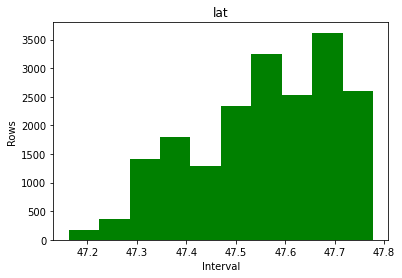

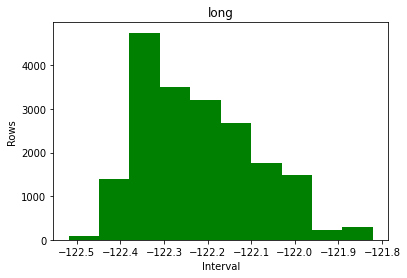

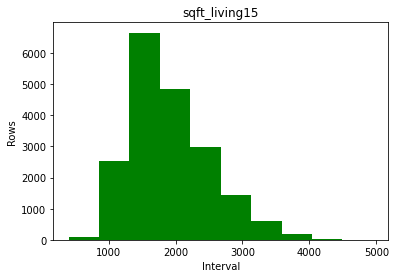

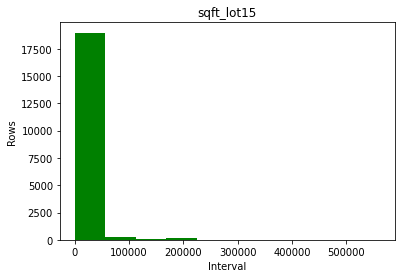

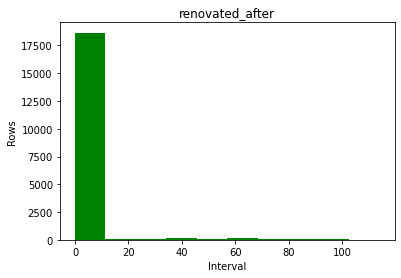

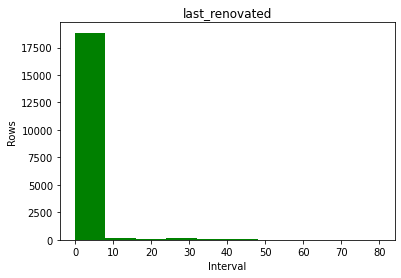

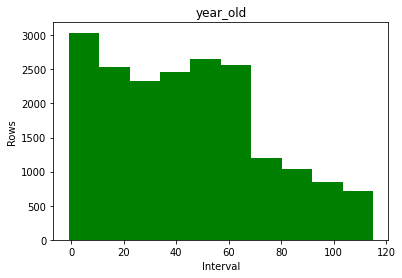

In [30]:
for col in numerical_columns:
    plt.hist(data[col], bins=10, color="green")
    plt.ylabel('Rows')
    plt.xlabel('Interval')
    plt.title(col)
    plt.show()

## Exploring categorical columns

In [31]:
categorical_columns = ['condition', 'waterfront', 'zipcode', 'ever_renovated']

In [32]:
data[categorical_columns] = data[categorical_columns].astype(object)

<AxesSubplot:xlabel='condition'>

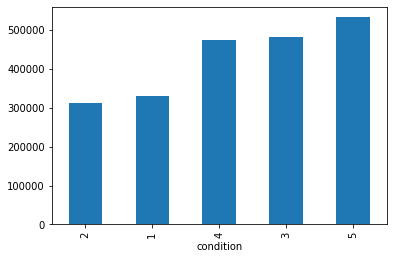

In [33]:
data.groupby('condition')['price'].mean().sort_values().plot(kind= "bar")

In [34]:
from statsmodels.formula.api import ols # ANOVA
import statsmodels.api as sm

In [35]:
mod = ols('price ~ condition', data = data).fit()
anova_table = sm.stats.anova_lm(mod, typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
condition,9.046957e+12,4.0,46.251504,9.630604e-39
Residual,9.481392e+14,19389.0,NaN,NaN


<AxesSubplot:xlabel='waterfront'>

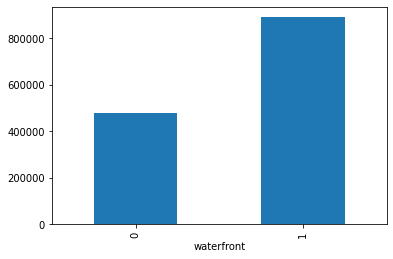

In [36]:
data.groupby('waterfront')['price'].mean().sort_values().plot(kind= "bar")

In [37]:
mod = ols('price ~ waterfront', data=data).fit()
anova_table = sm.stats.anova_lm(mod, typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
waterfront,1.622643e+13,1.0,334.406345,4.423944e-74
Residual,9.409597e+14,19392.0,NaN,NaN


<AxesSubplot:xlabel='ever_renovated'>

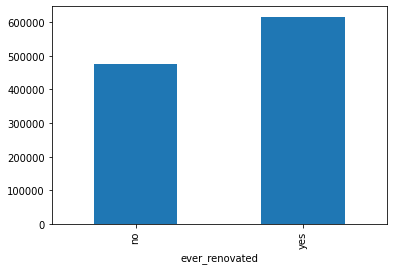

In [38]:
data.groupby('ever_renovated')['price'].mean().sort_values().plot(kind= "bar")

In [39]:
mod = ols('price ~ ever_renovated', data=data).fit()
anova_table = sm.stats.anova_lm(mod, typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
ever_renovated,1.416265e+13,1.0,291.235709,7.956571e-65
Residual,9.430235e+14,19392.0,NaN,NaN


### Creating dummy variables

In [40]:
data = pd.get_dummies(data, columns = ['condition', 'waterfront', 'ever_renovated'], drop_first=True)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [41]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,...,sqft_lot15,renovated_after,last_renovated,year_old,condition_2,condition_3,condition_4,condition_5,waterfront_1,ever_renovated_yes
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,7,1180,...,5650,0,0,59,0,1,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,7,2170,...,7639,40,23,63,0,1,0,0,0,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,6,770,...,8062,0,0,82,0,1,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,7,1050,...,5000,0,0,49,0,0,0,1,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,8,1680,...,7503,0,0,28,0,1,0,0,0,0


<AxesSubplot:xlabel='zipcode'>

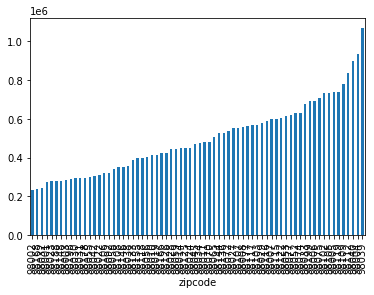

In [42]:
data.groupby('zipcode')['price'].mean().sort_values().plot(kind= "bar")

In [43]:
mod = ols('price ~ zipcode', data=data).fit()
anova_table = sm.stats.anova_lm(mod, typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
zipcode,4.957391e+14,69.0,300.87026,0.0
Residual,4.614470e+14,19324.0,NaN,NaN


In [44]:
zip_table = data.groupby('zipcode').agg({'price':"mean"}).sort_values('price')
zip_table

,price
zipcode,
98002,2.322942e+05
98168,2.379120e+05
98032,2.445096e+05
98001,2.765656e+05
98023,2.774681e+05
...,...
98109,7.819743e+05
98112,8.373941e+05
98040,8.972256e+05


In [45]:
zip_table['zip_group'] = pd.cut(zip_table['price'], bins = 10, 
                               labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [46]:
zip_table

,price,zip_group
zipcode,,
98002,2.322942e+05,1
98168,2.379120e+05,1
98032,2.445096e+05,1
98001,2.765656e+05,1
98023,2.774681e+05,1
...,...,...
98109,7.819743e+05,7
98112,8.373941e+05,8
98040,8.972256e+05,8


In [47]:
zip_table = zip_table.drop(columns="price")

In [48]:
data = pd.merge(data, zip_table, how = "left", left_on= "zipcode", right_index = True)

In [49]:
data = data.drop(columns='zipcode')

In [50]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,...,renovated_after,last_renovated,year_old,condition_2,condition_3,condition_4,condition_5,waterfront_1,ever_renovated_yes,zip_group
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,7,1180,...,0,0,59,0,1,0,0,0,0,1
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,7,2170,...,40,23,63,0,1,0,0,0,1,3
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,6,770,...,0,0,82,0,1,0,0,0,0,3
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,7,1050,...,0,0,49,0,0,0,1,0,0,4
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,8,1680,...,0,0,28,0,1,0,0,0,0,5


In [51]:
data = pd.get_dummies(data, columns=['zip_group'], drop_first=True)

In [52]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,...,ever_renovated_yes,zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9,zip_group_10
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,7,1180,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,7,2170,...,1,0,1,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,6,770,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,7,1050,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,8,1680,...,0,0,0,0,1,0,0,0,0,0


In [53]:
import seaborn as sns

## Plotting correlation

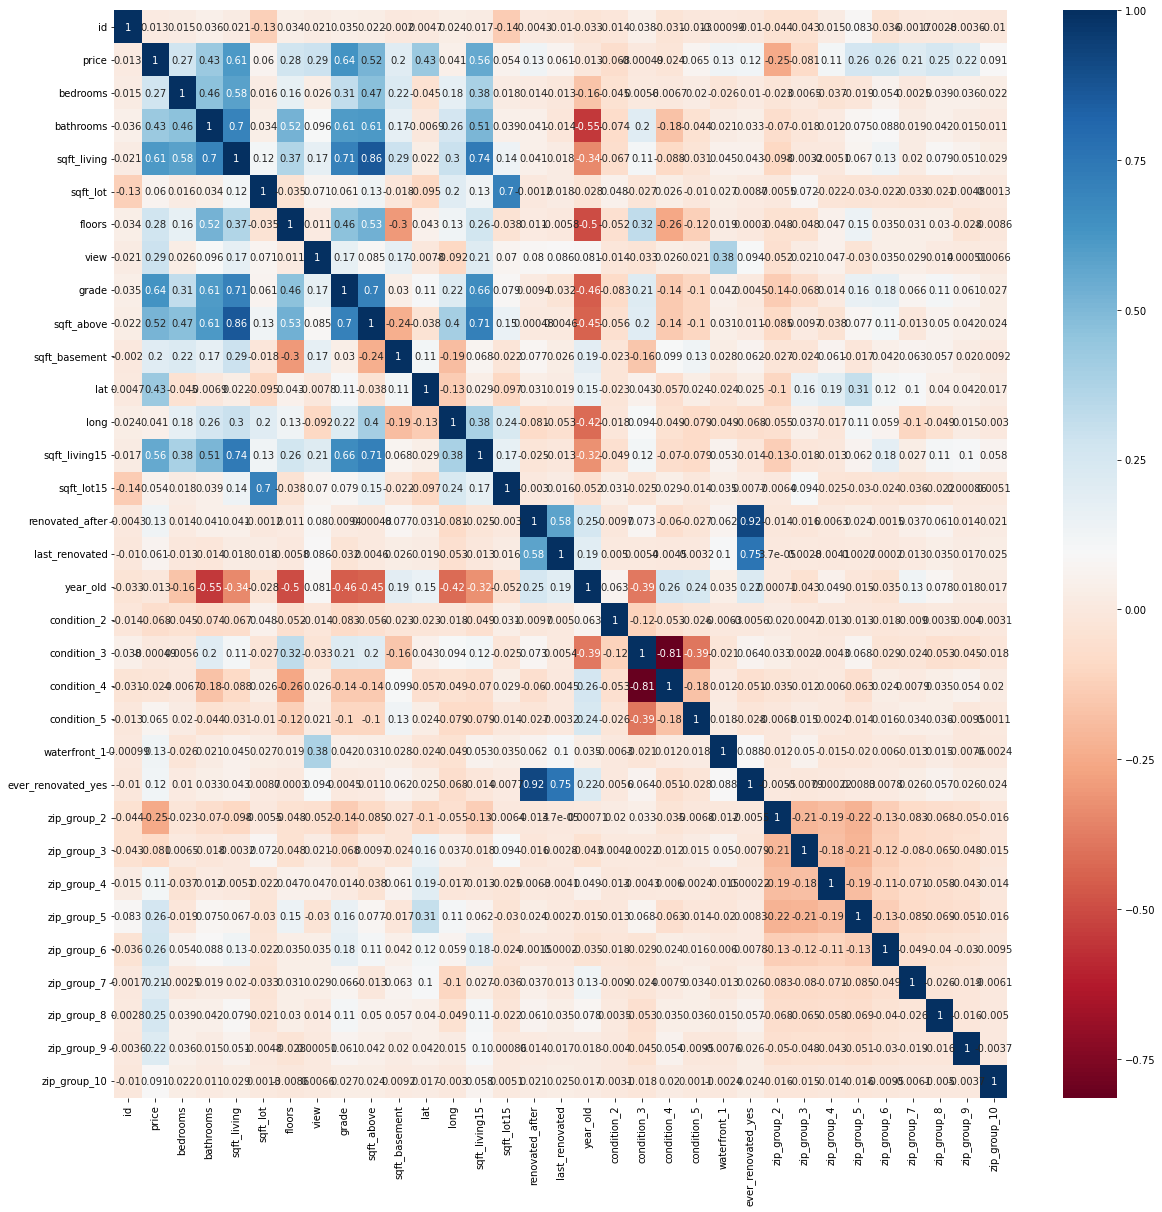

In [54]:
fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(data.corr(), annot = True, cmap = "RdBu")
plt.show()

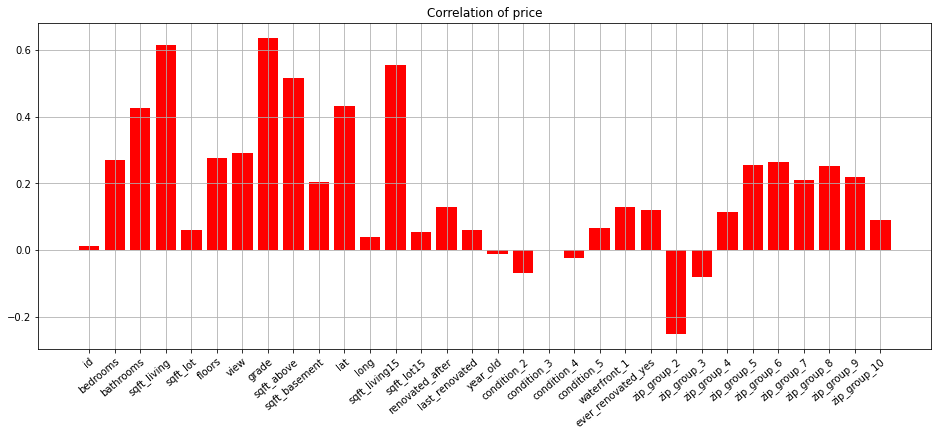

In [55]:
features = data.columns.tolist()
features.remove('price')
fig, ax = plt.subplots(figsize= (16, 6))
plt.bar(features, data.corr()['price'].drop("price"), color="red")
plt.grid()
plt.xticks(rotation="40", ha="right", rotation_mode = "anchor")
plt.title("Correlation of price")
plt.show()

## Feature extraction

In [56]:
data = data.drop(columns=['id', 'year_old', 'condition_3', 'condition_4'])

In [57]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,...,ever_renovated_yes,zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9,zip_group_10
0,221900.0,3,1.00,1180,5650,1.0,0,7,1180,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,7,2170,400,...,1,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,6,770,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,7,1050,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,8,1680,0,...,0,0,0,0,1,0,0,0,0,0


## Splitting dataset

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X=data.iloc[:, 1:]
Y=data.iloc[:, 0]

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [61]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((15515, 28), (15515,), (3879, 28), (3879,))

## Scaling feature variables

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [64]:
x_train, x_test

(array([[-0.38089697, -0.80008391, -0.72576776, ..., -0.14581217,
         -0.10711685, -0.03501604],
        [-0.38089697,  0.33649188,  0.85097886, ..., -0.14581217,
         -0.10711685, -0.03501604],
        [-1.67374678, -1.5578011 , -0.92828567, ..., -0.14581217,
         -0.10711685, -0.03501604],
        ...,
        [-0.38089697,  0.33649188, -0.13267958, ..., -0.14581217,
         -0.10711685, -0.03501604],
        [-1.67374678, -0.80008391, -0.20500741, ..., -0.14581217,
         -0.10711685, -0.03501604],
        [-0.38089697, -0.04236672,  0.22895955, ..., -0.14581217,
         -0.10711685, -0.03501604]]),
 array([[-0.38089697, -0.04236672, -0.3351975 , ..., -0.14581217,
         -0.10711685, -0.03501604],
        [-0.38089697, -1.5578011 ,  0.14216616, ..., -0.14581217,
         -0.10711685, -0.03501604],
        [ 0.91195284,  0.71535047,  1.86356843, ..., -0.14581217,
         -0.10711685, -0.03501604],
        ...,
        [-0.38089697,  0.71535047, -0.3351975 , ..., -

## Predictive analysis

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [66]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [67]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", mean_squared_error(y_test, y_pred)**(1/2))
print("R2 score: ", r2_score(y_test, y_pred))

Mean Absolute Error:  69929.15935228187
Mean Squared Error:  9006392238.96709
Root Mean Squared Error:  94902.0138825678
R2 score:  0.8237366579907281


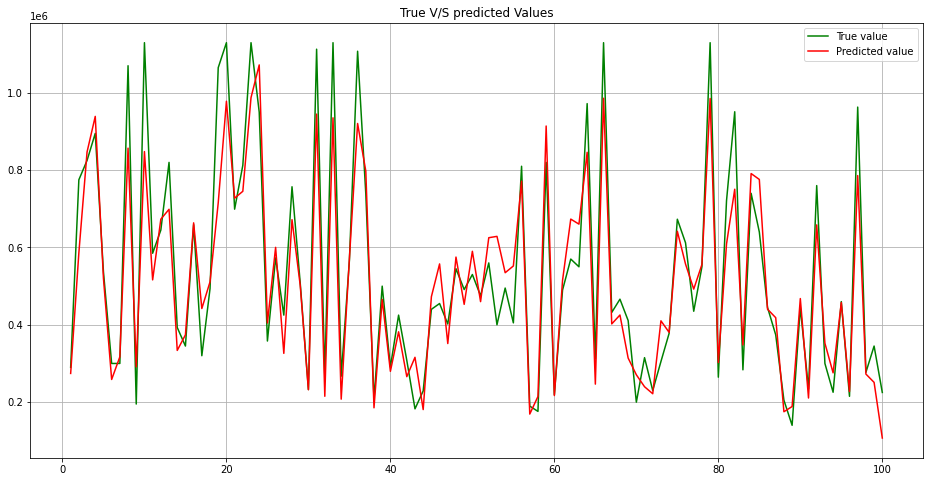

In [68]:
fig, ax = plt.subplots(figsize = (16, 8))
plt.plot(np.arange(1, 101), y_test[:100], color = "green", label = "True value")
plt.plot(np.arange(1, 101), y_pred[:100], color = "red", label = "Predicted value")
plt.title("True V/S predicted Values")
plt.legend()
plt.grid()
plt.show()